# Inverse

In [1]:
import sys
sys.path.append('./src')
import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from torch.autograd import Variable, grad
from src.model import FNN
from src.util import *
from src.train import *
import time

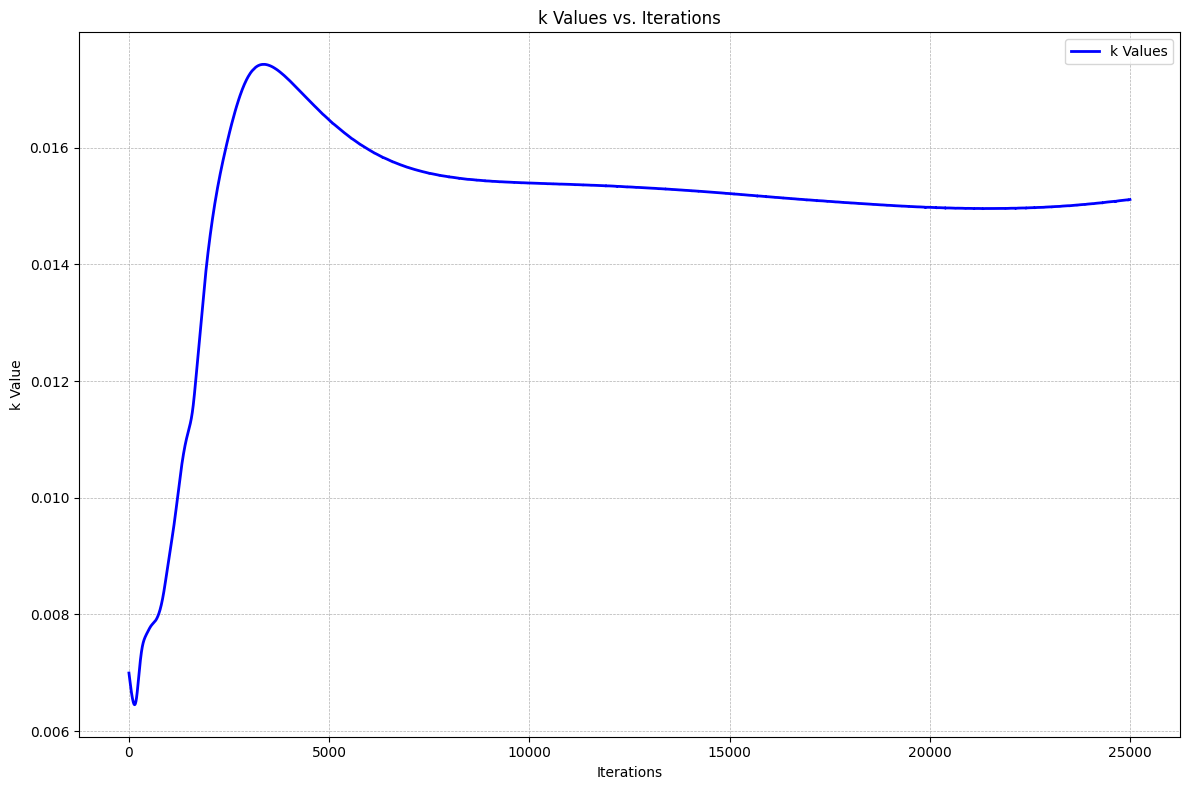

In [51]:
k_hist = np.load("Update1/k_history.npy")

# Define the iterations (x-axis)
iterations = np.arange(len(k_hist))

# Plot Cp values over iterations
plt.figure(figsize=(12, 8))

plt.plot(iterations, k_hist, label="k Values", color="blue", linewidth=2)

# Add labels, title, and legend
plt.xlabel("Iterations")
plt.ylabel("k Value")
plt.title("k Values vs. Iterations")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Optimize layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

data_partial = np.load('data/2_inverse/data_partial.npy')

# Print the first 5 rows
print("Shape:", data_partial.shape)
print("First 5 rows:\n", data_partial[:5])


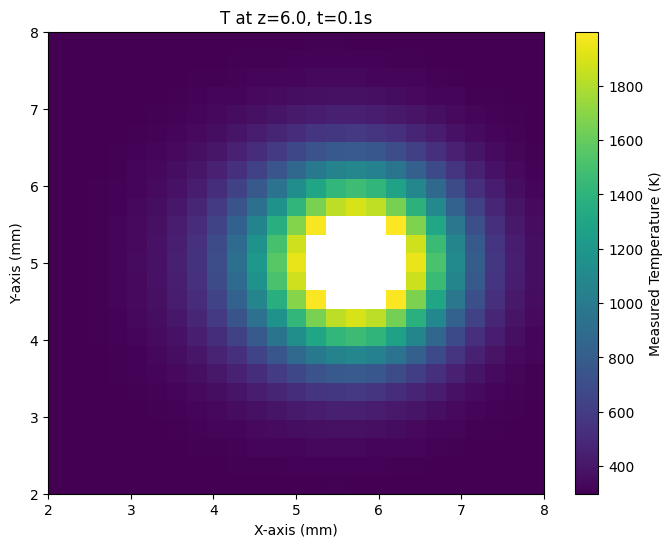

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
data_partial = np.load('data/2_inverse/data_partial.npy')

# Extract
x = data_partial[:, 0]
y = data_partial[:, 1]
z = data_partial[:, 2]
t = data_partial[:, 3]
T = data_partial[:, 4]

# Filter for t ~ 1s
mask = np.isclose(t, 0.1, atol=0.01)
x_1s = x[mask]
y_1s = y[mask]
T_1s = T[mask]

# Create a pivot grid (assuming x,y form a nice grid)
# Find unique sorted x and y
x_unique = np.sort(np.unique(x_1s))
y_unique = np.sort(np.unique(y_1s))

# Create a 2D array of T values
T_grid = np.full((len(y_unique), len(x_unique)), np.nan)

# Fill grid
for xi, yi, Ti in zip(x_1s, y_1s, T_1s):
    ix = np.where(x_unique == xi)[0][0]
    iy = np.where(y_unique == yi)[0][0]
    T_grid[iy, ix] = Ti

# Plot
plt.figure(figsize=(8,6))
plt.imshow(T_grid, extent=[x_unique.min(), x_unique.max(), y_unique.min(), y_unique.max()],
           origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Measured Temperature (K)')
plt.title('T at z=6.0, t=0.1s')
plt.xlabel('X-axis (mm)')
plt.ylabel('Y-axis (mm)')
plt.show()


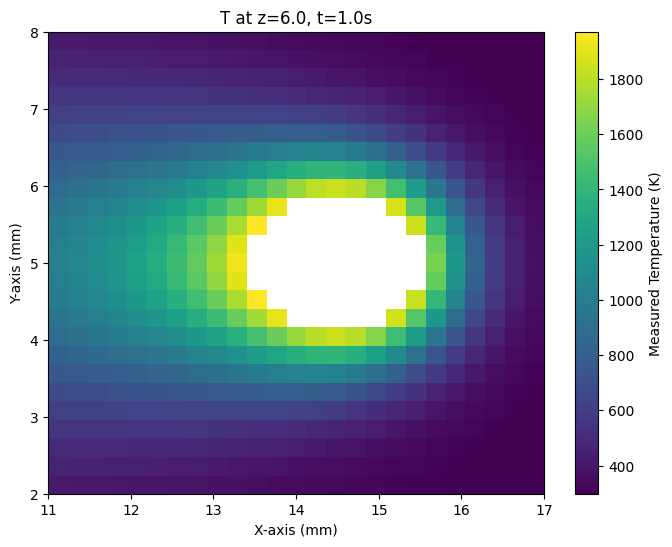

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
data_partial = np.load('data/2_inverse/data_partial.npy')

# Extract
x = data_partial[:, 0]
y = data_partial[:, 1]
z = data_partial[:, 2]
t = data_partial[:, 3]
T = data_partial[:, 4]

# Filter for t ~ 1s
mask = np.isclose(t, 1, atol=0.01)
x_1s = x[mask]
y_1s = y[mask]
T_1s = T[mask]

# Create a pivot grid (assuming x,y form a nice grid)
# Find unique sorted x and y
x_unique = np.sort(np.unique(x_1s))
y_unique = np.sort(np.unique(y_1s))

# Create a 2D array of T values
T_grid = np.full((len(y_unique), len(x_unique)), np.nan)

# Fill grid
for xi, yi, Ti in zip(x_1s, y_1s, T_1s):
    ix = np.where(x_unique == xi)[0][0]
    iy = np.where(y_unique == yi)[0][0]
    T_grid[iy, ix] = Ti

# Plot
plt.figure(figsize=(8,6))
plt.imshow(T_grid, extent=[x_unique.min(), x_unique.max(), y_unique.min(), y_unique.max()],
           origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Measured Temperature (K)')
plt.title('T at z=6.0, t=1.0s')
plt.xlabel('X-axis (mm)')
plt.ylabel('Y-axis (mm)')
plt.show()



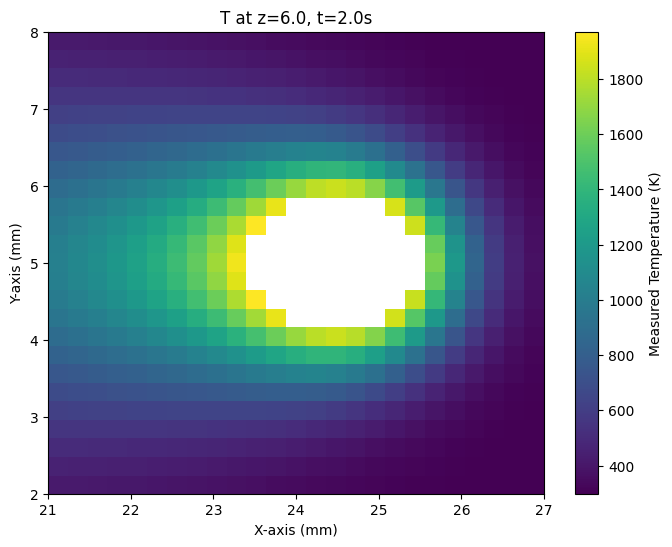

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
data_partial = np.load('data/2_inverse/data_partial.npy')

# Extract
x = data_partial[:, 0]
y = data_partial[:, 1]
z = data_partial[:, 2]
t = data_partial[:, 3]
T = data_partial[:, 4]

# Filter for t ~ 1s
mask = np.isclose(t, 2.0, atol=0.01)
x_1s = x[mask]
y_1s = y[mask]
T_1s = T[mask]

# Create a pivot grid (assuming x,y form a nice grid)
# Find unique sorted x and y
x_unique = np.sort(np.unique(x_1s))
y_unique = np.sort(np.unique(y_1s))

# Create a 2D array of T values
T_grid = np.full((len(y_unique), len(x_unique)), np.nan)

# Fill grid
for xi, yi, Ti in zip(x_1s, y_1s, T_1s):
    ix = np.where(x_unique == xi)[0][0]
    iy = np.where(y_unique == yi)[0][0]
    T_grid[iy, ix] = Ti

# Plot
plt.figure(figsize=(8,6))
plt.imshow(T_grid, extent=[x_unique.min(), x_unique.max(), y_unique.min(), y_unique.max()],
           origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Measured Temperature (K)')
plt.title('T at z=6.0, t=2.0s')
plt.xlabel('X-axis (mm)')
plt.ylabel('Y-axis (mm)')
plt.show()


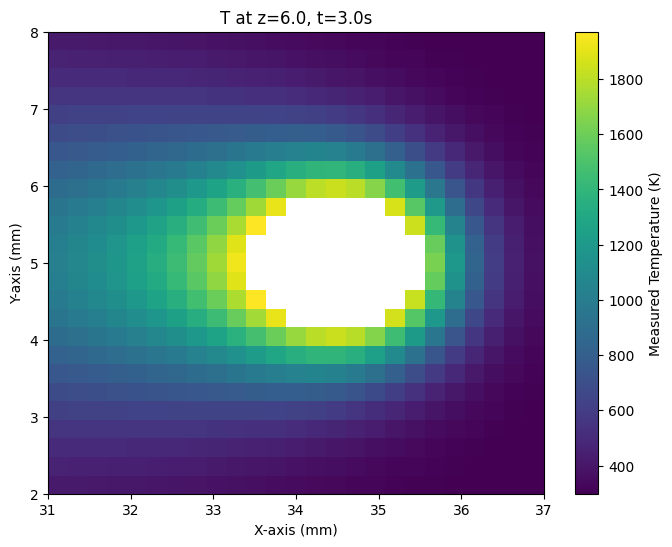

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
data_partial = np.load('data/2_inverse/data_partial.npy')

# Extract
x = data_partial[:, 0]
y = data_partial[:, 1]
z = data_partial[:, 2]
t = data_partial[:, 3]
T = data_partial[:, 4]

# Filter for t ~ 1s
mask = np.isclose(t, 3.0, atol=0.01)
x_1s = x[mask]
y_1s = y[mask]
T_1s = T[mask]

# Create a pivot grid 
# Find unique sorted x and y
x_unique = np.sort(np.unique(x_1s))
y_unique = np.sort(np.unique(y_1s))

# Create a 2D array of T values
T_grid = np.full((len(y_unique), len(x_unique)), np.nan)

# Fill grid
for xi, yi, Ti in zip(x_1s, y_1s, T_1s):
    ix = np.where(x_unique == xi)[0][0]
    iy = np.where(y_unique == yi)[0][0]
    T_grid[iy, ix] = Ti

# Plot
plt.figure(figsize=(8,6))
plt.imshow(T_grid, extent=[x_unique.min(), x_unique.max(), y_unique.min(), y_unique.max()],
           origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Measured Temperature (K)')
plt.title('T at z=6.0, t=3.0s')
plt.xlabel('X-axis (mm)')
plt.ylabel('Y-axis (mm)')
plt.show()


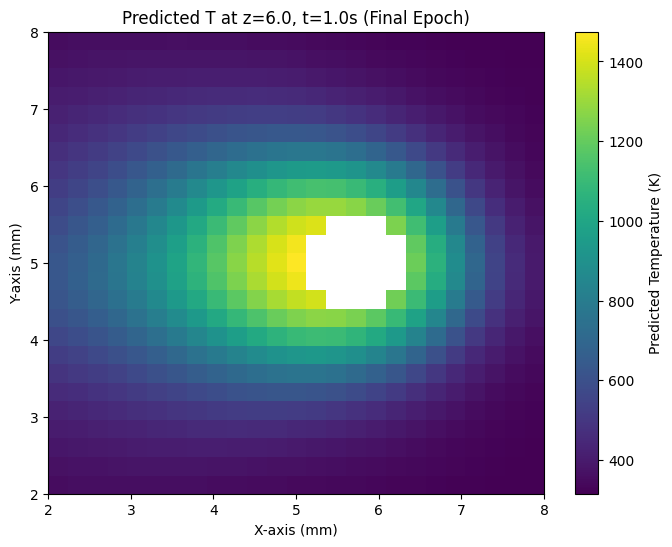

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Load predicted snapshot data (final epoch)
snapshot_path = 'results/tempResults.npz'  # Make sure the path is correct
data = np.load(snapshot_path)

# Extract true and predicted temperatures for the final snapshot 
T_true = data["iter_25000_true"] ## May Need to Change
T_pred = data["iter_25000_pred"]

# Load the original data for x and y coordinates
data_partial = np.load('data/2_inverse/data_partial.npy')
x = data_partial[:, 0]
y = data_partial[:, 1]
t = data_partial[:, 3]

# Filter for t ~ 3.0s
mask = np.isclose(t, 0.1, atol=0.01)
x_3s = x[mask]
y_3s = y[mask]
T_pred_3s = T_pred[mask]

# Create a pivot grid for predicted values (x, y grid)
x_unique = np.sort(np.unique(x_3s))
y_unique = np.sort(np.unique(y_3s))
T_grid_pred = np.full((len(y_unique), len(x_unique)), np.nan)

# Fill grid for predicted values
for xi, yi, Ti in zip(x_3s, y_3s, T_pred_3s):
    ix = np.where(x_unique == xi)[0][0]
    iy = np.where(y_unique == yi)[0][0]
    T_grid_pred[iy, ix] = Ti

# Plotting the predicted temperature grid
plt.figure(figsize=(8, 6))
plt.imshow(T_grid_pred, extent=[x_unique.min(), x_unique.max(), y_unique.min(), y_unique.max()],
           origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Predicted Temperature (K)')
plt.title('Predicted T at z=6.0, t=1.0s (Final Epoch)')
plt.xlabel('X-axis (mm)')
plt.ylabel('Y-axis (mm)')
plt.show()

In [57]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Load the snapshot data
snapshot_path = "results/tempResults.npz"
data = np.load(snapshot_path)

# Extract true and predicted temperatures for the three snapshots
T0_true, T0_pred = data["iter_0_true"], data["iter_0_pred"]
Tmid_true, Tmid_pred = data["iter_12500_true"], data["iter_12500_pred"]
Tlast_true, Tlast_pred = data["iter_25000_true"], data["iter_25000_pred"]

# Plotting function
def plot_snapshot(true_values, predicted_values, title=""):
    plt.figure(figsize=(8, 6))
    plt.scatter(true_values, predicted_values, alpha=0.5)
    plt.plot([true_values.min(), true_values.max()],
             [true_values.min(), true_values.max()], 'r--', linewidth=1)
    plt.xlabel("True Temperature (K)")
    plt.ylabel("Predicted Temperature (K)")
    plt.title(title)
    plt.grid(True)
    plt.show()

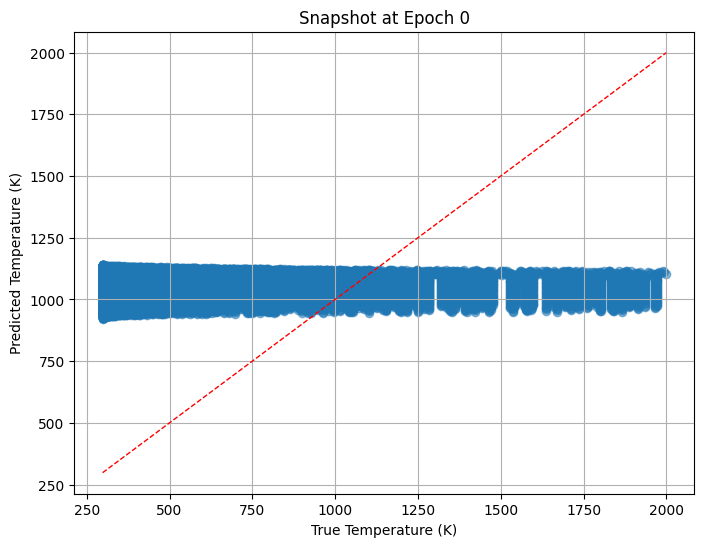

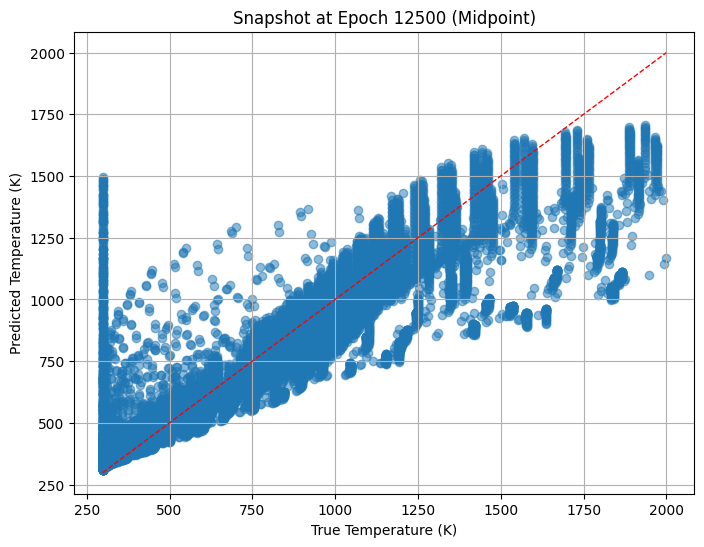

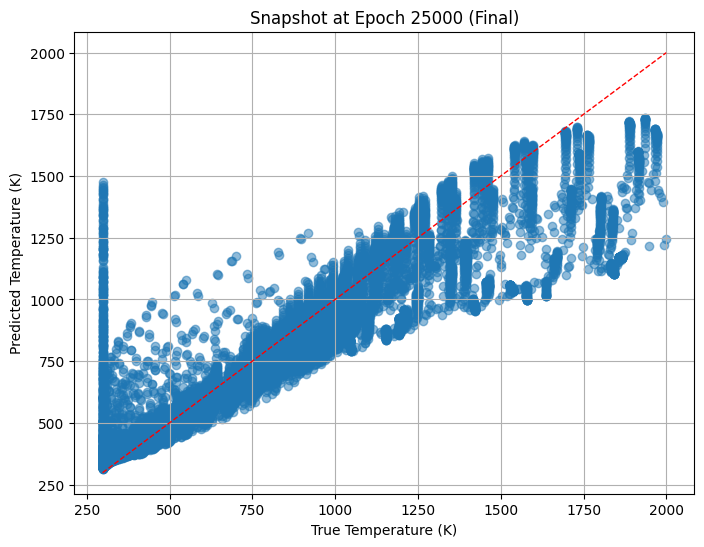

In [58]:
plot_snapshot(T0_true, T0_pred, "Snapshot at Epoch 0")
plot_snapshot(Tmid_true, Tmid_pred, "Snapshot at Epoch 12500 (Midpoint)")
plot_snapshot(Tlast_true, Tlast_pred, "Snapshot at Epoch 25000 (Final)")

In [70]:
import re

# Raw log data
log_data = '''
Epoch     0/25000 | L=1.18e+02 | P/D/B=1.64e-03/3.11e+05/4.36e+01 | Cp=0.4500 k=0.0070 | Time=1.1s
Epoch   100/25000 | L=1.06e+02 | P/D/B=4.71e-03/1.81e+05/4.40e+01 | Cp=0.4494 k=0.0065 | Time=87.3s
Epoch   200/25000 | L=9.81e+01 | P/D/B=4.52e-03/1.81e+05/4.00e+01 | Cp=0.4489 k=0.0066 | Time=184.7s
Epoch   300/25000 | L=8.99e+01 | P/D/B=1.32e-02/1.67e+05/3.66e+01 | Cp=0.4494 k=0.0073 | Time=279.6s
Epoch   400/25000 | L=8.74e+01 | P/D/B=5.34e-02/1.54e+05/3.59e+01 | Cp=0.4506 k=0.0076 | Time=371.6s
Epoch   500/25000 | L=8.43e+01 | P/D/B=1.87e-01/1.35e+05/3.49e+01 | Cp=0.4514 k=0.0077 | Time=462.7s
Epoch   600/25000 | L=8.18e+01 | P/D/B=4.73e-01/1.18e+05/3.38e+01 | Cp=0.4521 k=0.0078 | Time=554.0s
Epoch   700/25000 | L=7.97e+01 | P/D/B=4.85e-01/1.14e+05/3.29e+01 | Cp=0.4530 k=0.0079 | Time=645.9s
Epoch   800/25000 | L=7.69e+01 | P/D/B=3.97e-01/1.12e+05/3.18e+01 | Cp=0.4539 k=0.0081 | Time=737.4s
Epoch   900/25000 | L=7.34e+01 | P/D/B=3.48e-01/1.09e+05/3.04e+01 | Cp=0.4548 k=0.0085 | Time=832.8s
Epoch  1000/25000 | L=7.05e+01 | P/D/B=4.06e-01/1.04e+05/2.90e+01 | Cp=0.4555 k=0.0090 | Time=930.4s
Epoch  1100/25000 | L=6.82e+01 | P/D/B=4.13e-01/1.03e+05/2.79e+01 | Cp=0.4561 k=0.0094 | Time=1025.4s
Epoch  1200/25000 | L=6.53e+01 | P/D/B=3.68e-01/1.02e+05/2.66e+01 | Cp=0.4567 k=0.0099 | Time=1120.1s
Epoch  1300/25000 | L=6.19e+01 | P/D/B=3.91e-01/9.93e+04/2.50e+01 | Cp=0.4576 k=0.0105 | Time=1213.8s
Epoch  1400/25000 | L=5.91e+01 | P/D/B=4.93e-01/9.38e+04/2.36e+01 | Cp=0.4587 k=0.0109 | Time=1308.2s
Epoch  1500/25000 | L=5.64e+01 | P/D/B=5.19e-01/8.91e+04/2.24e+01 | Cp=0.4596 k=0.0112 | Time=1401.9s
Epoch  1600/25000 | L=5.14e+01 | P/D/B=4.84e-01/8.54e+04/2.02e+01 | Cp=0.4605 k=0.0116 | Time=1495.4s
Epoch  1700/25000 | L=4.60e+01 | P/D/B=5.89e-01/8.43e+04/1.73e+01 | Cp=0.4613 k=0.0122 | Time=1589.0s
Epoch  1800/25000 | L=3.97e+01 | P/D/B=4.34e-01/8.42e+04/1.46e+01 | Cp=0.4620 k=0.0130 | Time=1683.4s
Epoch  1900/25000 | L=3.27e+01 | P/D/B=3.64e-01/8.31e+04/1.13e+01 | Cp=0.4628 k=0.0137 | Time=1777.4s
Epoch  2000/25000 | L=2.77e+01 | P/D/B=3.96e-01/8.04e+04/8.83e+00 | Cp=0.4635 k=0.0143 | Time=1871.2s
Epoch  2100/25000 | L=2.42e+01 | P/D/B=4.24e-01/7.75e+04/7.16e+00 | Cp=0.4642 k=0.0148 | Time=1966.1s
Epoch  2200/25000 | L=2.16e+01 | P/D/B=3.81e-01/7.48e+04/6.13e+00 | Cp=0.4648 k=0.0153 | Time=2060.2s
Epoch  2300/25000 | L=1.98e+01 | P/D/B=3.54e-01/7.21e+04/5.40e+00 | Cp=0.4654 k=0.0156 | Time=2153.4s
Epoch  2400/25000 | L=1.83e+01 | P/D/B=3.14e-01/6.94e+04/4.89e+00 | Cp=0.4660 k=0.0159 | Time=2247.0s
Epoch  2500/25000 | L=1.69e+01 | P/D/B=2.67e-01/6.65e+04/4.48e+00 | Cp=0.4665 k=0.0162 | Time=2340.4s
Epoch  2600/25000 | L=1.58e+01 | P/D/B=2.27e-01/6.38e+04/4.16e+00 | Cp=0.4669 k=0.0165 | Time=2434.6s
Epoch  2700/25000 | L=1.49e+01 | P/D/B=1.93e-01/6.13e+04/3.91e+00 | Cp=0.4673 k=0.0167 | Time=2528.2s
Epoch  2800/25000 | L=1.42e+01 | P/D/B=1.64e-01/5.92e+04/3.71e+00 | Cp=0.4676 k=0.0169 | Time=2621.8s
Epoch  2900/25000 | L=1.36e+01 | P/D/B=1.46e-01/5.75e+04/3.56e+00 | Cp=0.4679 k=0.0171 | Time=2715.9s
Epoch  3000/25000 | L=1.32e+01 | P/D/B=1.30e-01/5.62e+04/3.44e+00 | Cp=0.4681 k=0.0172 | Time=2809.5s
Epoch  3100/25000 | L=1.28e+01 | P/D/B=1.20e-01/5.52e+04/3.36e+00 | Cp=0.4684 k=0.0173 | Time=2902.8s
Epoch  3200/25000 | L=1.26e+01 | P/D/B=1.20e-01/5.42e+04/3.29e+00 | Cp=0.4686 k=0.0174 | Time=2996.6s
Epoch  3300/25000 | L=1.24e+01 | P/D/B=1.07e-01/5.36e+04/3.24e+00 | Cp=0.4688 k=0.0174 | Time=3090.0s
Epoch  3400/25000 | L=1.22e+01 | P/D/B=1.03e-01/5.30e+04/3.20e+00 | Cp=0.4690 k=0.0174 | Time=3184.2s
Epoch  3500/25000 | L=1.22e+01 | P/D/B=1.13e-01/5.27e+04/3.17e+00 | Cp=0.4692 k=0.0174 | Time=3277.6s
Epoch  3600/25000 | L=1.19e+01 | P/D/B=9.44e-02/5.19e+04/3.14e+00 | Cp=0.4694 k=0.0174 | Time=3370.9s
Epoch  3700/25000 | L=1.18e+01 | P/D/B=9.14e-02/5.13e+04/3.12e+00 | Cp=0.4695 k=0.0173 | Time=3464.6s
Epoch  3800/25000 | L=1.20e+01 | P/D/B=1.55e-01/5.04e+04/3.11e+00 | Cp=0.4697 k=0.0173 | Time=3558.7s
Epoch  3900/25000 | L=1.16e+01 | P/D/B=8.54e-02/5.04e+04/3.09e+00 | Cp=0.4699 k=0.0172 | Time=3652.4s
Epoch  4000/25000 | L=1.16e+01 | P/D/B=8.28e-02/4.99e+04/3.07e+00 | Cp=0.4700 k=0.0172 | Time=3746.2s
Epoch  4100/25000 | L=1.15e+01 | P/D/B=8.08e-02/4.95e+04/3.06e+00 | Cp=0.4702 k=0.0171 | Time=3840.1s
Epoch  4200/25000 | L=1.14e+01 | P/D/B=7.91e-02/4.91e+04/3.05e+00 | Cp=0.4703 k=0.0170 | Time=3934.0s
Epoch  4300/25000 | L=1.13e+01 | P/D/B=7.69e-02/4.87e+04/3.04e+00 | Cp=0.4705 k=0.0169 | Time=4028.1s
Epoch  4400/25000 | L=1.13e+01 | P/D/B=7.47e-02/4.83e+04/3.03e+00 | Cp=0.4706 k=0.0169 | Time=4121.8s
Epoch  4500/25000 | L=1.12e+01 | P/D/B=7.36e-02/4.79e+04/3.02e+00 | Cp=0.4707 k=0.0168 | Time=4216.9s
Epoch  4600/25000 | L=1.11e+01 | P/D/B=7.19e-02/4.76e+04/3.01e+00 | Cp=0.4709 k=0.0167 | Time=4310.4s
Epoch  4700/25000 | L=1.11e+01 | P/D/B=7.07e-02/4.72e+04/3.00e+00 | Cp=0.4710 k=0.0167 | Time=4404.2s
Epoch  4800/25000 | L=1.10e+01 | P/D/B=6.95e-02/4.69e+04/2.99e+00 | Cp=0.4711 k=0.0166 | Time=4498.0s
Epoch  4900/25000 | L=1.10e+01 | P/D/B=6.84e-02/4.65e+04/2.98e+00 | Cp=0.4712 k=0.0165 | Time=4592.2s
Epoch  5000/25000 | L=1.09e+01 | P/D/B=6.71e-02/4.62e+04/2.97e+00 | Cp=0.4713 k=0.0165 | Time=4686.6s
Epoch  5100/25000 | L=1.09e+01 | P/D/B=7.24e-02/4.58e+04/2.97e+00 | Cp=0.4714 k=0.0164 | Time=4780.1s
Epoch  5200/25000 | L=1.08e+01 | P/D/B=6.51e-02/4.56e+04/2.96e+00 | Cp=0.4715 k=0.0164 | Time=4874.3s
Epoch  5300/25000 | L=1.07e+01 | P/D/B=6.41e-02/4.53e+04/2.95e+00 | Cp=0.4716 k=0.0163 | Time=4968.5s
Epoch  5400/25000 | L=1.07e+01 | P/D/B=6.31e-02/4.50e+04/2.94e+00 | Cp=0.4717 k=0.0162 | Time=5062.2s
Epoch  5500/25000 | L=1.07e+01 | P/D/B=6.23e-02/4.48e+04/2.93e+00 | Cp=0.4718 k=0.0162 | Time=5155.9s
Epoch  5600/25000 | L=1.06e+01 | P/D/B=6.12e-02/4.45e+04/2.92e+00 | Cp=0.4718 k=0.0161 | Time=5249.5s
Epoch  5700/25000 | L=1.06e+01 | P/D/B=6.06e-02/4.42e+04/2.92e+00 | Cp=0.4719 k=0.0161 | Time=5343.6s
Epoch  5800/25000 | L=1.05e+01 | P/D/B=6.06e-02/4.39e+04/2.91e+00 | Cp=0.4720 k=0.0160 | Time=5437.2s
Epoch  5900/25000 | L=1.05e+01 | P/D/B=5.90e-02/4.37e+04/2.90e+00 | Cp=0.4721 k=0.0160 | Time=5530.8s
Epoch  6000/25000 | L=1.04e+01 | P/D/B=5.82e-02/4.35e+04/2.89e+00 | Cp=0.4721 k=0.0160 | Time=5625.7s
Epoch  6100/25000 | L=1.04e+01 | P/D/B=5.74e-02/4.33e+04/2.89e+00 | Cp=0.4722 k=0.0159 | Time=5719.1s
Epoch  6200/25000 | L=1.04e+01 | P/D/B=5.67e-02/4.31e+04/2.88e+00 | Cp=0.4722 k=0.0159 | Time=5812.3s
Epoch  6300/25000 | L=1.03e+01 | P/D/B=5.61e-02/4.28e+04/2.87e+00 | Cp=0.4723 k=0.0158 | Time=5906.1s
Epoch  6400/25000 | L=1.03e+01 | P/D/B=5.56e-02/4.26e+04/2.87e+00 | Cp=0.4723 k=0.0158 | Time=6000.2s
Epoch  6500/25000 | L=1.02e+01 | P/D/B=5.47e-02/4.24e+04/2.86e+00 | Cp=0.4724 k=0.0158 | Time=6093.9s
Epoch  6600/25000 | L=1.02e+01 | P/D/B=5.60e-02/4.23e+04/2.85e+00 | Cp=0.4724 k=0.0158 | Time=6187.5s
Epoch  6700/25000 | L=1.02e+01 | P/D/B=5.34e-02/4.20e+04/2.85e+00 | Cp=0.4725 k=0.0157 | Time=6280.6s
Epoch  6800/25000 | L=1.01e+01 | P/D/B=5.30e-02/4.19e+04/2.84e+00 | Cp=0.4725 k=0.0157 | Time=6374.5s
Epoch  6900/25000 | L=1.01e+01 | P/D/B=5.22e-02/4.17e+04/2.83e+00 | Cp=0.4726 k=0.0157 | Time=6467.8s
Epoch  7000/25000 | L=1.01e+01 | P/D/B=5.14e-02/4.15e+04/2.83e+00 | Cp=0.4726 k=0.0157 | Time=6561.3s
Epoch  7100/25000 | L=1.01e+01 | P/D/B=6.26e-02/4.11e+04/2.82e+00 | Cp=0.4726 k=0.0156 | Time=6655.4s
Epoch  7200/25000 | L=9.99e+00 | P/D/B=5.04e-02/4.12e+04/2.81e+00 | Cp=0.4727 k=0.0156 | Time=6749.1s
Epoch  7300/25000 | L=1.00e+01 | P/D/B=6.19e-02/4.14e+04/2.80e+00 | Cp=0.4727 k=0.0156 | Time=6843.0s
Epoch  7400/25000 | L=9.93e+00 | P/D/B=4.94e-02/4.08e+04/2.80e+00 | Cp=0.4727 k=0.0156 | Time=6936.3s
Epoch  7500/25000 | L=1.03e+01 | P/D/B=1.27e-01/4.14e+04/2.78e+00 | Cp=0.4727 k=0.0156 | Time=7030.7s
Epoch  7600/25000 | L=9.87e+00 | P/D/B=4.83e-02/4.05e+04/2.79e+00 | Cp=0.4728 k=0.0155 | Time=7124.2s
Epoch  7700/25000 | L=9.84e+00 | P/D/B=4.79e-02/4.04e+04/2.78e+00 | Cp=0.4728 k=0.0155 | Time=7217.9s
Epoch  7800/25000 | L=9.81e+00 | P/D/B=4.75e-02/4.03e+04/2.77e+00 | Cp=0.4728 k=0.0155 | Time=7311.6s
Epoch  7900/25000 | L=9.78e+00 | P/D/B=4.70e-02/4.01e+04/2.77e+00 | Cp=0.4728 k=0.0155 | Time=7405.8s
Epoch  8000/25000 | L=1.01e+01 | P/D/B=1.03e-01/4.06e+04/2.75e+00 | Cp=0.4728 k=0.0155 | Time=7499.2s
Epoch  8100/25000 | L=9.72e+00 | P/D/B=4.62e-02/3.98e+04/2.75e+00 | Cp=0.4729 k=0.0155 | Time=7592.4s
Epoch  8200/25000 | L=9.69e+00 | P/D/B=4.58e-02/3.97e+04/2.75e+00 | Cp=0.4729 k=0.0155 | Time=7685.9s
Epoch  8300/25000 | L=9.67e+00 | P/D/B=4.53e-02/3.96e+04/2.74e+00 | Cp=0.4729 k=0.0155 | Time=7780.1s
Epoch  8400/25000 | L=9.64e+00 | P/D/B=4.51e-02/3.94e+04/2.74e+00 | Cp=0.4729 k=0.0155 | Time=7873.8s
Epoch  8500/25000 | L=9.61e+00 | P/D/B=4.47e-02/3.93e+04/2.73e+00 | Cp=0.4729 k=0.0155 | Time=7967.0s
Epoch  8600/25000 | L=9.59e+00 | P/D/B=4.44e-02/3.92e+04/2.72e+00 | Cp=0.4729 k=0.0155 | Time=8061.3s
Epoch  8700/25000 | L=9.67e+00 | P/D/B=6.94e-02/3.88e+04/2.72e+00 | Cp=0.4729 k=0.0154 | Time=8155.0s
Epoch  8800/25000 | L=9.54e+00 | P/D/B=4.38e-02/3.90e+04/2.71e+00 | Cp=0.4729 k=0.0154 | Time=8248.4s
Epoch  8900/25000 | L=9.57e+00 | P/D/B=5.69e-02/3.87e+04/2.71e+00 | Cp=0.4729 k=0.0154 | Time=8342.5s
Epoch  9000/25000 | L=9.49e+00 | P/D/B=4.31e-02/3.88e+04/2.70e+00 | Cp=0.4729 k=0.0154 | Time=8436.8s
Epoch  9100/25000 | L=9.48e+00 | P/D/B=4.81e-02/3.85e+04/2.69e+00 | Cp=0.4729 k=0.0154 | Time=8530.8s
Epoch  9200/25000 | L=9.44e+00 | P/D/B=4.26e-02/3.85e+04/2.69e+00 | Cp=0.4729 k=0.0154 | Time=8624.4s
Epoch  9300/25000 | L=9.42e+00 | P/D/B=4.31e-02/3.84e+04/2.68e+00 | Cp=0.4729 k=0.0154 | Time=8718.0s
Epoch  9400/25000 | L=9.40e+00 | P/D/B=4.21e-02/3.83e+04/2.68e+00 | Cp=0.4729 k=0.0154 | Time=8812.3s
Epoch  9500/25000 | L=9.37e+00 | P/D/B=4.20e-02/3.82e+04/2.67e+00 | Cp=0.4729 k=0.0154 | Time=8906.0s
Epoch  9600/25000 | L=9.35e+00 | P/D/B=4.19e-02/3.81e+04/2.66e+00 | Cp=0.4729 k=0.0154 | Time=8999.7s
Epoch  9700/25000 | L=9.33e+00 | P/D/B=4.14e-02/3.81e+04/2.66e+00 | Cp=0.4729 k=0.0154 | Time=9093.0s
Epoch  9800/25000 | L=9.40e+00 | P/D/B=5.62e-02/3.82e+04/2.65e+00 | Cp=0.4729 k=0.0154 | Time=9188.1s
Epoch  9900/25000 | L=9.28e+00 | P/D/B=4.10e-02/3.79e+04/2.65e+00 | Cp=0.4729 k=0.0154 | Time=9281.5s
Epoch 10000/25000 | L=9.26e+00 | P/D/B=4.07e-02/3.78e+04/2.64e+00 | Cp=0.4729 k=0.0154 | Time=9374.7s
Epoch 10100/25000 | L=9.24e+00 | P/D/B=4.05e-02/3.77e+04/2.63e+00 | Cp=0.4729 k=0.0154 | Time=9468.1s
Epoch 10200/25000 | L=9.22e+00 | P/D/B=4.03e-02/3.76e+04/2.63e+00 | Cp=0.4729 k=0.0154 | Time=9562.4s
Epoch 10300/25000 | L=9.21e+00 | P/D/B=4.19e-02/3.76e+04/2.62e+00 | Cp=0.4729 k=0.0154 | Time=9655.9s
Epoch 10400/25000 | L=9.18e+00 | P/D/B=4.01e-02/3.74e+04/2.62e+00 | Cp=0.4729 k=0.0154 | Time=9749.0s
Epoch 10500/25000 | L=9.16e+00 | P/D/B=4.01e-02/3.73e+04/2.61e+00 | Cp=0.4729 k=0.0154 | Time=9842.9s
Epoch 10600/25000 | L=9.40e+00 | P/D/B=8.52e-02/3.77e+04/2.60e+00 | Cp=0.4729 k=0.0154 | Time=9936.8s
Epoch 10700/25000 | L=9.11e+00 | P/D/B=3.96e-02/3.72e+04/2.60e+00 | Cp=0.4729 k=0.0154 | Time=10030.1s
Epoch 10800/25000 | L=9.09e+00 | P/D/B=3.96e-02/3.71e+04/2.59e+00 | Cp=0.4729 k=0.0154 | Time=10123.5s
Epoch 10900/25000 | L=9.07e+00 | P/D/B=3.96e-02/3.70e+04/2.59e+00 | Cp=0.4729 k=0.0154 | Time=10217.8s
Epoch 11000/25000 | L=9.05e+00 | P/D/B=3.93e-02/3.69e+04/2.58e+00 | Cp=0.4729 k=0.0154 | Time=10311.4s
Epoch 11100/25000 | L=9.03e+00 | P/D/B=3.91e-02/3.68e+04/2.58e+00 | Cp=0.4729 k=0.0154 | Time=10404.9s
Epoch 11200/25000 | L=9.01e+00 | P/D/B=3.88e-02/3.68e+04/2.57e+00 | Cp=0.4729 k=0.0154 | Time=10498.7s
Epoch 11300/25000 | L=8.99e+00 | P/D/B=3.88e-02/3.67e+04/2.57e+00 | Cp=0.4729 k=0.0154 | Time=10592.7s
Epoch 11400/25000 | L=8.98e+00 | P/D/B=3.92e-02/3.66e+04/2.56e+00 | Cp=0.4729 k=0.0154 | Time=10686.5s
Epoch 11500/25000 | L=8.95e+00 | P/D/B=3.85e-02/3.65e+04/2.56e+00 | Cp=0.4729 k=0.0154 | Time=10779.9s
Epoch 11600/25000 | L=8.94e+00 | P/D/B=3.83e-02/3.65e+04/2.55e+00 | Cp=0.4729 k=0.0154 | Time=10873.5s
Epoch 11700/25000 | L=8.91e+00 | P/D/B=3.84e-02/3.63e+04/2.54e+00 | Cp=0.4729 k=0.0154 | Time=10967.7s
Epoch 11800/25000 | L=8.90e+00 | P/D/B=3.81e-02/3.63e+04/2.54e+00 | Cp=0.4729 k=0.0154 | Time=11061.2s
Epoch 11900/25000 | L=8.88e+00 | P/D/B=3.84e-02/3.62e+04/2.53e+00 | Cp=0.4729 k=0.0153 | Time=11155.2s
Epoch 12000/25000 | L=8.86e+00 | P/D/B=3.79e-02/3.61e+04/2.53e+00 | Cp=0.4729 k=0.0153 | Time=11248.8s
Epoch 12100/25000 | L=8.84e+00 | P/D/B=3.78e-02/3.60e+04/2.52e+00 | Cp=0.4729 k=0.0153 | Time=11343.5s
Epoch 12200/25000 | L=8.98e+00 | P/D/B=7.46e-02/3.57e+04/2.52e+00 | Cp=0.4729 k=0.0153 | Time=11437.3s
Epoch 12300/25000 | L=8.80e+00 | P/D/B=3.77e-02/3.59e+04/2.51e+00 | Cp=0.4729 k=0.0153 | Time=11531.4s
Epoch 12400/25000 | L=8.78e+00 | P/D/B=3.76e-02/3.58e+04/2.51e+00 | Cp=0.4729 k=0.0153 | Time=11625.8s
Epoch 12500/25000 | L=8.77e+00 | P/D/B=3.73e-02/3.58e+04/2.50e+00 | Cp=0.4729 k=0.0153 | Time=11719.9s
Epoch 12600/25000 | L=8.75e+00 | P/D/B=3.74e-02/3.57e+04/2.50e+00 | Cp=0.4729 k=0.0153 | Time=11813.3s
Epoch 12700/25000 | L=8.73e+00 | P/D/B=3.78e-02/3.56e+04/2.49e+00 | Cp=0.4728 k=0.0153 | Time=11907.6s
Epoch 12800/25000 | L=8.71e+00 | P/D/B=3.73e-02/3.55e+04/2.49e+00 | Cp=0.4728 k=0.0153 | Time=12002.1s
Epoch 12900/25000 | L=8.70e+00 | P/D/B=3.83e-02/3.55e+04/2.48e+00 | Cp=0.4728 k=0.0153 | Time=12096.0s
Epoch 13000/25000 | L=8.67e+00 | P/D/B=3.71e-02/3.54e+04/2.48e+00 | Cp=0.4728 k=0.0153 | Time=12189.5s
Epoch 13100/25000 | L=8.66e+00 | P/D/B=3.77e-02/3.53e+04/2.47e+00 | Cp=0.4728 k=0.0153 | Time=12283.9s
Epoch 13200/25000 | L=8.64e+00 | P/D/B=3.70e-02/3.52e+04/2.47e+00 | Cp=0.4728 k=0.0153 | Time=12378.2s
Epoch 13300/25000 | L=8.62e+00 | P/D/B=3.69e-02/3.51e+04/2.46e+00 | Cp=0.4728 k=0.0153 | Time=12472.1s
Epoch 13400/25000 | L=8.96e+00 | P/D/B=1.01e-01/3.56e+04/2.45e+00 | Cp=0.4728 k=0.0153 | Time=12566.1s
Epoch 13500/25000 | L=8.58e+00 | P/D/B=3.69e-02/3.50e+04/2.45e+00 | Cp=0.4728 k=0.0153 | Time=12659.7s
Epoch 13600/25000 | L=8.57e+00 | P/D/B=3.88e-02/3.49e+04/2.45e+00 | Cp=0.4728 k=0.0153 | Time=12753.5s
Epoch 13700/25000 | L=8.55e+00 | P/D/B=3.70e-02/3.48e+04/2.44e+00 | Cp=0.4728 k=0.0153 | Time=12847.3s
Epoch 13800/25000 | L=8.53e+00 | P/D/B=3.68e-02/3.48e+04/2.44e+00 | Cp=0.4728 k=0.0153 | Time=12941.0s
Epoch 13900/25000 | L=8.57e+00 | P/D/B=4.58e-02/3.49e+04/2.43e+00 | Cp=0.4728 k=0.0153 | Time=13035.4s
Epoch 14000/25000 | L=8.50e+00 | P/D/B=3.69e-02/3.46e+04/2.43e+00 | Cp=0.4728 k=0.0153 | Time=13128.4s
Epoch 14100/25000 | L=8.48e+00 | P/D/B=3.70e-02/3.45e+04/2.42e+00 | Cp=0.4728 k=0.0153 | Time=13220.4s
Epoch 14200/25000 | L=8.47e+00 | P/D/B=3.68e-02/3.45e+04/2.42e+00 | Cp=0.4728 k=0.0153 | Time=13311.6s
Epoch 14300/25000 | L=8.45e+00 | P/D/B=3.69e-02/3.44e+04/2.41e+00 | Cp=0.4728 k=0.0153 | Time=13403.5s
Epoch 14400/25000 | L=8.47e+00 | P/D/B=4.61e-02/3.41e+04/2.41e+00 | Cp=0.4728 k=0.0152 | Time=13495.0s
Epoch 14500/25000 | L=8.42e+00 | P/D/B=3.70e-02/3.42e+04/2.40e+00 | Cp=0.4728 k=0.0152 | Time=13586.3s
Epoch 14600/25000 | L=8.40e+00 | P/D/B=3.69e-02/3.42e+04/2.40e+00 | Cp=0.4728 k=0.0152 | Time=13677.8s
Epoch 14700/25000 | L=8.39e+00 | P/D/B=3.70e-02/3.41e+04/2.40e+00 | Cp=0.4728 k=0.0152 | Time=13769.1s
Epoch 14800/25000 | L=8.37e+00 | P/D/B=3.70e-02/3.40e+04/2.39e+00 | Cp=0.4728 k=0.0152 | Time=13861.0s
Epoch 14900/25000 | L=8.39e+00 | P/D/B=4.28e-02/3.41e+04/2.39e+00 | Cp=0.4728 k=0.0152 | Time=13952.7s
Epoch 15000/25000 | L=8.34e+00 | P/D/B=3.71e-02/3.39e+04/2.38e+00 | Cp=0.4728 k=0.0152 | Time=14044.1s
Epoch 15100/25000 | L=8.33e+00 | P/D/B=3.83e-02/3.37e+04/2.38e+00 | Cp=0.4728 k=0.0152 | Time=14135.8s
Epoch 15200/25000 | L=8.31e+00 | P/D/B=3.73e-02/3.37e+04/2.38e+00 | Cp=0.4728 k=0.0152 | Time=14227.7s
Epoch 15300/25000 | L=8.41e+00 | P/D/B=5.52e-02/3.40e+04/2.36e+00 | Cp=0.4728 k=0.0152 | Time=14319.2s
Epoch 15400/25000 | L=8.28e+00 | P/D/B=3.74e-02/3.36e+04/2.37e+00 | Cp=0.4728 k=0.0152 | Time=14411.9s
Epoch 15500/25000 | L=8.29e+00 | P/D/B=4.03e-02/3.36e+04/2.36e+00 | Cp=0.4728 k=0.0152 | Time=14503.5s
Epoch 15600/25000 | L=8.25e+00 | P/D/B=3.75e-02/3.34e+04/2.36e+00 | Cp=0.4728 k=0.0152 | Time=14595.4s
Epoch 15700/25000 | L=8.41e+00 | P/D/B=6.70e-02/3.37e+04/2.35e+00 | Cp=0.4728 k=0.0152 | Time=14686.9s
Epoch 15800/25000 | L=8.22e+00 | P/D/B=3.76e-02/3.33e+04/2.35e+00 | Cp=0.4728 k=0.0152 | Time=14777.8s
Epoch 15900/25000 | L=8.21e+00 | P/D/B=3.89e-02/3.32e+04/2.35e+00 | Cp=0.4728 k=0.0152 | Time=14869.0s
Epoch 16000/25000 | L=8.20e+00 | P/D/B=3.77e-02/3.32e+04/2.35e+00 | Cp=0.4728 k=0.0152 | Time=14960.7s
Epoch 16100/25000 | L=8.18e+00 | P/D/B=3.77e-02/3.31e+04/2.34e+00 | Cp=0.4728 k=0.0152 | Time=15052.6s
Epoch 16200/25000 | L=8.17e+00 | P/D/B=3.76e-02/3.30e+04/2.34e+00 | Cp=0.4728 k=0.0151 | Time=15143.8s
Epoch 16300/25000 | L=8.16e+00 | P/D/B=3.78e-02/3.29e+04/2.34e+00 | Cp=0.4728 k=0.0151 | Time=15235.4s
Epoch 16400/25000 | L=8.14e+00 | P/D/B=3.77e-02/3.29e+04/2.33e+00 | Cp=0.4727 k=0.0151 | Time=15327.5s
Epoch 16500/25000 | L=8.13e+00 | P/D/B=3.79e-02/3.28e+04/2.33e+00 | Cp=0.4727 k=0.0151 | Time=15419.6s
Epoch 16600/25000 | L=8.12e+00 | P/D/B=3.81e-02/3.27e+04/2.33e+00 | Cp=0.4727 k=0.0151 | Time=15511.2s
Epoch 16700/25000 | L=8.10e+00 | P/D/B=3.80e-02/3.27e+04/2.32e+00 | Cp=0.4727 k=0.0151 | Time=15603.3s
Epoch 16800/25000 | L=8.09e+00 | P/D/B=3.79e-02/3.26e+04/2.32e+00 | Cp=0.4727 k=0.0151 | Time=15694.8s
Epoch 16900/25000 | L=8.08e+00 | P/D/B=3.80e-02/3.25e+04/2.32e+00 | Cp=0.4727 k=0.0151 | Time=15786.7s
Epoch 17000/25000 | L=8.06e+00 | P/D/B=3.82e-02/3.24e+04/2.31e+00 | Cp=0.4727 k=0.0151 | Time=15878.2s
Epoch 17100/25000 | L=8.05e+00 | P/D/B=3.80e-02/3.24e+04/2.31e+00 | Cp=0.4727 k=0.0151 | Time=15970.0s
Epoch 17200/25000 | L=8.04e+00 | P/D/B=3.91e-02/3.23e+04/2.31e+00 | Cp=0.4727 k=0.0151 | Time=16061.0s
Epoch 17300/25000 | L=8.03e+00 | P/D/B=3.81e-02/3.23e+04/2.30e+00 | Cp=0.4727 k=0.0151 | Time=16153.5s
Epoch 17400/25000 | L=8.01e+00 | P/D/B=3.81e-02/3.22e+04/2.30e+00 | Cp=0.4727 k=0.0151 | Time=16245.3s
Epoch 17500/25000 | L=8.00e+00 | P/D/B=3.84e-02/3.21e+04/2.30e+00 | Cp=0.4727 k=0.0151 | Time=16337.1s
Epoch 17600/25000 | L=7.99e+00 | P/D/B=3.81e-02/3.21e+04/2.30e+00 | Cp=0.4727 k=0.0151 | Time=16428.9s
Epoch 17700/25000 | L=7.98e+00 | P/D/B=3.84e-02/3.20e+04/2.29e+00 | Cp=0.4727 k=0.0151 | Time=16520.5s
Epoch 17800/25000 | L=7.96e+00 | P/D/B=3.82e-02/3.19e+04/2.29e+00 | Cp=0.4727 k=0.0151 | Time=16611.9s
Epoch 17900/25000 | L=7.95e+00 | P/D/B=3.84e-02/3.18e+04/2.29e+00 | Cp=0.4727 k=0.0151 | Time=16703.3s
Epoch 18000/25000 | L=7.94e+00 | P/D/B=3.82e-02/3.18e+04/2.28e+00 | Cp=0.4727 k=0.0151 | Time=16794.8s
Epoch 18100/25000 | L=7.92e+00 | P/D/B=3.81e-02/3.17e+04/2.28e+00 | Cp=0.4727 k=0.0151 | Time=16887.2s
Epoch 18200/25000 | L=7.91e+00 | P/D/B=3.81e-02/3.16e+04/2.28e+00 | Cp=0.4727 k=0.0150 | Time=16979.5s
Epoch 18300/25000 | L=7.90e+00 | P/D/B=3.83e-02/3.16e+04/2.28e+00 | Cp=0.4727 k=0.0150 | Time=17071.0s
Epoch 18400/25000 | L=7.89e+00 | P/D/B=3.86e-02/3.15e+04/2.27e+00 | Cp=0.4727 k=0.0150 | Time=17162.6s
Epoch 18500/25000 | L=7.87e+00 | P/D/B=3.83e-02/3.14e+04/2.27e+00 | Cp=0.4727 k=0.0150 | Time=17253.7s
Epoch 18600/25000 | L=7.89e+00 | P/D/B=4.16e-02/3.15e+04/2.26e+00 | Cp=0.4727 k=0.0150 | Time=17345.8s
Epoch 18700/25000 | L=7.85e+00 | P/D/B=3.82e-02/3.13e+04/2.26e+00 | Cp=0.4727 k=0.0150 | Time=17437.0s
Epoch 18800/25000 | L=7.84e+00 | P/D/B=3.87e-02/3.12e+04/2.26e+00 | Cp=0.4727 k=0.0150 | Time=17528.4s
Epoch 18900/25000 | L=7.82e+00 | P/D/B=3.82e-02/3.11e+04/2.26e+00 | Cp=0.4727 k=0.0150 | Time=17619.9s
Epoch 19000/25000 | L=7.81e+00 | P/D/B=3.81e-02/3.11e+04/2.26e+00 | Cp=0.4727 k=0.0150 | Time=17711.6s
Epoch 19100/25000 | L=7.80e+00 | P/D/B=3.81e-02/3.10e+04/2.25e+00 | Cp=0.4727 k=0.0150 | Time=17803.3s
Epoch 19200/25000 | L=7.78e+00 | P/D/B=3.82e-02/3.09e+04/2.25e+00 | Cp=0.4727 k=0.0150 | Time=17894.9s
Epoch 19300/25000 | L=8.07e+00 | P/D/B=9.20e-02/3.13e+04/2.24e+00 | Cp=0.4727 k=0.0150 | Time=17986.6s
Epoch 19400/25000 | L=7.76e+00 | P/D/B=3.81e-02/3.08e+04/2.25e+00 | Cp=0.4727 k=0.0150 | Time=18078.5s
Epoch 19500/25000 | L=7.76e+00 | P/D/B=4.19e-02/3.06e+04/2.25e+00 | Cp=0.4727 k=0.0150 | Time=18170.3s
Epoch 19600/25000 | L=7.73e+00 | P/D/B=3.81e-02/3.06e+04/2.24e+00 | Cp=0.4727 k=0.0150 | Time=18261.6s
Epoch 19700/25000 | L=7.73e+00 | P/D/B=4.05e-02/3.05e+04/2.24e+00 | Cp=0.4727 k=0.0150 | Time=18352.7s
Epoch 19800/25000 | L=7.71e+00 | P/D/B=3.81e-02/3.05e+04/2.24e+00 | Cp=0.4727 k=0.0150 | Time=18443.9s
Epoch 19900/25000 | L=8.10e+00 | P/D/B=1.10e-01/3.10e+04/2.22e+00 | Cp=0.4727 k=0.0150 | Time=18536.0s
Epoch 20000/25000 | L=7.68e+00 | P/D/B=3.80e-02/3.03e+04/2.23e+00 | Cp=0.4727 k=0.0150 | Time=18627.7s
Epoch 20100/25000 | L=7.67e+00 | P/D/B=3.80e-02/3.03e+04/2.23e+00 | Cp=0.4727 k=0.0150 | Time=18719.6s
Epoch 20200/25000 | L=7.67e+00 | P/D/B=3.99e-02/3.03e+04/2.22e+00 | Cp=0.4727 k=0.0150 | Time=18811.1s
Epoch 20300/25000 | L=7.65e+00 | P/D/B=3.80e-02/3.01e+04/2.22e+00 | Cp=0.4727 k=0.0150 | Time=18903.3s
Epoch 20400/25000 | L=7.64e+00 | P/D/B=3.97e-02/3.01e+04/2.22e+00 | Cp=0.4727 k=0.0150 | Time=18994.5s
Epoch 20500/25000 | L=7.62e+00 | P/D/B=3.79e-02/3.00e+04/2.22e+00 | Cp=0.4728 k=0.0150 | Time=19085.9s
Epoch 20600/25000 | L=7.61e+00 | P/D/B=3.80e-02/2.99e+04/2.21e+00 | Cp=0.4728 k=0.0150 | Time=19177.7s
Epoch 20700/25000 | L=7.60e+00 | P/D/B=3.79e-02/2.98e+04/2.21e+00 | Cp=0.4728 k=0.0150 | Time=19269.8s
Epoch 20800/25000 | L=7.58e+00 | P/D/B=3.80e-02/2.98e+04/2.21e+00 | Cp=0.4728 k=0.0150 | Time=19361.3s
Epoch 20900/25000 | L=7.68e+00 | P/D/B=6.34e-02/2.96e+04/2.21e+00 | Cp=0.4728 k=0.0150 | Time=19452.6s
Epoch 21000/25000 | L=7.56e+00 | P/D/B=3.80e-02/2.96e+04/2.20e+00 | Cp=0.4728 k=0.0150 | Time=19544.2s
Epoch 21100/25000 | L=7.62e+00 | P/D/B=5.56e-02/2.94e+04/2.20e+00 | Cp=0.4728 k=0.0150 | Time=19636.0s
Epoch 21200/25000 | L=7.53e+00 | P/D/B=3.80e-02/2.95e+04/2.20e+00 | Cp=0.4728 k=0.0150 | Time=19728.4s
Epoch 21300/25000 | L=7.52e+00 | P/D/B=3.81e-02/2.94e+04/2.19e+00 | Cp=0.4728 k=0.0150 | Time=19820.1s
Epoch 21400/25000 | L=7.51e+00 | P/D/B=3.79e-02/2.93e+04/2.19e+00 | Cp=0.4728 k=0.0150 | Time=19911.8s
Epoch 21500/25000 | L=7.51e+00 | P/D/B=4.14e-02/2.92e+04/2.19e+00 | Cp=0.4728 k=0.0150 | Time=20003.9s
Epoch 21600/25000 | L=7.48e+00 | P/D/B=3.80e-02/2.92e+04/2.19e+00 | Cp=0.4728 k=0.0150 | Time=20096.4s
Epoch 21700/25000 | L=7.59e+00 | P/D/B=6.01e-02/2.94e+04/2.18e+00 | Cp=0.4728 k=0.0150 | Time=20187.9s
Epoch 21800/25000 | L=7.45e+00 | P/D/B=3.81e-02/2.90e+04/2.18e+00 | Cp=0.4728 k=0.0150 | Time=20278.9s
Epoch 21900/25000 | L=7.59e+00 | P/D/B=7.04e-02/2.88e+04/2.18e+00 | Cp=0.4728 k=0.0150 | Time=20370.0s
Epoch 22000/25000 | L=7.43e+00 | P/D/B=3.81e-02/2.89e+04/2.17e+00 | Cp=0.4728 k=0.0150 | Time=20462.4s
Epoch 22100/25000 | L=7.42e+00 | P/D/B=3.82e-02/2.88e+04/2.17e+00 | Cp=0.4728 k=0.0150 | Time=20554.6s
Epoch 22200/25000 | L=7.40e+00 | P/D/B=3.81e-02/2.88e+04/2.17e+00 | Cp=0.4728 k=0.0150 | Time=20646.3s
Epoch 22300/25000 | L=7.39e+00 | P/D/B=3.82e-02/2.87e+04/2.17e+00 | Cp=0.4728 k=0.0150 | Time=20737.8s
Epoch 22400/25000 | L=8.04e+00 | P/D/B=1.62e-01/2.92e+04/2.15e+00 | Cp=0.4728 k=0.0150 | Time=20829.2s
Epoch 22500/25000 | L=7.37e+00 | P/D/B=3.83e-02/2.85e+04/2.16e+00 | Cp=0.4728 k=0.0150 | Time=20921.0s
Epoch 22600/25000 | L=7.35e+00 | P/D/B=3.83e-02/2.85e+04/2.16e+00 | Cp=0.4728 k=0.0150 | Time=21012.6s
Epoch 22700/25000 | L=7.34e+00 | P/D/B=3.84e-02/2.84e+04/2.15e+00 | Cp=0.4728 k=0.0150 | Time=21104.2s
Epoch 22800/25000 | L=7.33e+00 | P/D/B=3.84e-02/2.83e+04/2.15e+00 | Cp=0.4728 k=0.0150 | Time=21195.5s
Epoch 22900/25000 | L=7.32e+00 | P/D/B=3.90e-02/2.82e+04/2.15e+00 | Cp=0.4728 k=0.0150 | Time=21287.7s
Epoch 23000/25000 | L=7.30e+00 | P/D/B=3.85e-02/2.82e+04/2.15e+00 | Cp=0.4728 k=0.0150 | Time=21379.0s
Epoch 23100/25000 | L=7.29e+00 | P/D/B=3.86e-02/2.81e+04/2.14e+00 | Cp=0.4728 k=0.0150 | Time=21470.9s
Epoch 23200/25000 | L=7.28e+00 | P/D/B=3.86e-02/2.80e+04/2.14e+00 | Cp=0.4728 k=0.0150 | Time=21562.3s
Epoch 23300/25000 | L=7.26e+00 | P/D/B=3.93e-02/2.79e+04/2.14e+00 | Cp=0.4728 k=0.0150 | Time=21654.1s
Epoch 23400/25000 | L=7.25e+00 | P/D/B=3.88e-02/2.79e+04/2.13e+00 | Cp=0.4728 k=0.0150 | Time=21745.1s
Epoch 23500/25000 | L=7.24e+00 | P/D/B=3.97e-02/2.79e+04/2.13e+00 | Cp=0.4728 k=0.0150 | Time=21836.3s
Epoch 23600/25000 | L=7.22e+00 | P/D/B=3.89e-02/2.77e+04/2.13e+00 | Cp=0.4728 k=0.0150 | Time=21927.4s
Epoch 23700/25000 | L=7.23e+00 | P/D/B=4.20e-02/2.78e+04/2.12e+00 | Cp=0.4728 k=0.0150 | Time=22018.9s
Epoch 23800/25000 | L=7.20e+00 | P/D/B=3.90e-02/2.76e+04/2.12e+00 | Cp=0.4729 k=0.0150 | Time=22110.8s
Epoch 23900/25000 | L=7.25e+00 | P/D/B=5.44e-02/2.74e+04/2.12e+00 | Cp=0.4729 k=0.0150 | Time=22202.6s
Epoch 24000/25000 | L=7.17e+00 | P/D/B=3.91e-02/2.75e+04/2.12e+00 | Cp=0.4729 k=0.0150 | Time=22294.3s
Epoch 24100/25000 | L=7.22e+00 | P/D/B=4.94e-02/2.76e+04/2.11e+00 | Cp=0.4729 k=0.0150 | Time=22386.3s
Epoch 24200/25000 | L=7.15e+00 | P/D/B=3.92e-02/2.73e+04/2.11e+00 | Cp=0.4729 k=0.0151 | Time=22478.5s
Epoch 24300/25000 | L=7.15e+00 | P/D/B=4.22e-02/2.73e+04/2.10e+00 | Cp=0.4729 k=0.0151 | Time=22569.8s
Epoch 24400/25000 | L=7.12e+00 | P/D/B=3.94e-02/2.72e+04/2.10e+00 | Cp=0.4729 k=0.0151 | Time=22661.2s
Epoch 24500/25000 | L=7.11e+00 | P/D/B=3.94e-02/2.71e+04/2.10e+00 | Cp=0.4729 k=0.0151 | Time=22752.8s
Epoch 24600/25000 | L=7.10e+00 | P/D/B=3.95e-02/2.71e+04/2.10e+00 | Cp=0.4729 k=0.0151 | Time=22845.0s
Epoch 24700/25000 | L=7.09e+00 | P/D/B=4.00e-02/2.70e+04/2.09e+00 | Cp=0.4729 k=0.0151 | Time=22936.4s
Epoch 24800/25000 | L=7.07e+00 | P/D/B=3.96e-02/2.69e+04/2.09e+00 | Cp=0.4729 k=0.0151 | Time=23027.8s
Epoch 24900/25000 | L=7.06e+00 | P/D/B=3.96e-02/2.69e+04/2.09e+00 | Cp=0.4729 k=0.0151 | Time=23119.3s
Epoch 25000/25000 | L=7.05e+00 | P/D/B=3.98e-02/2.68e+04/2.08e+00 | Cp=0.4729 k=0.0151 | Time=23211.1s
'''

# Regular expression to extract L, P, D, and B values
pattern = r"L=(\d+\.\d+e[+-]\d+|\d+\.\d+|\d+) \| P/D/B=(\d+\.\d+e[+-]\d+|\d+\.\d+|\d+)/(\d+\.\d+e[+-]\d+|\d+\.\d+|\d+)/(\d+\.\d+e[+-]\d+|\d+\.\d+|\d+)"

# Extracting values
L_list = []
P_list = []
D_list = []
B_list = []

for match in re.finditer(pattern, log_data):
    L_list.append(float(match.group(1)))
    P_list.append(float(match.group(2)))
    D_list.append(float(match.group(3)))
    B_list.append(float(match.group(4)))


In [71]:
len(L_list)

251

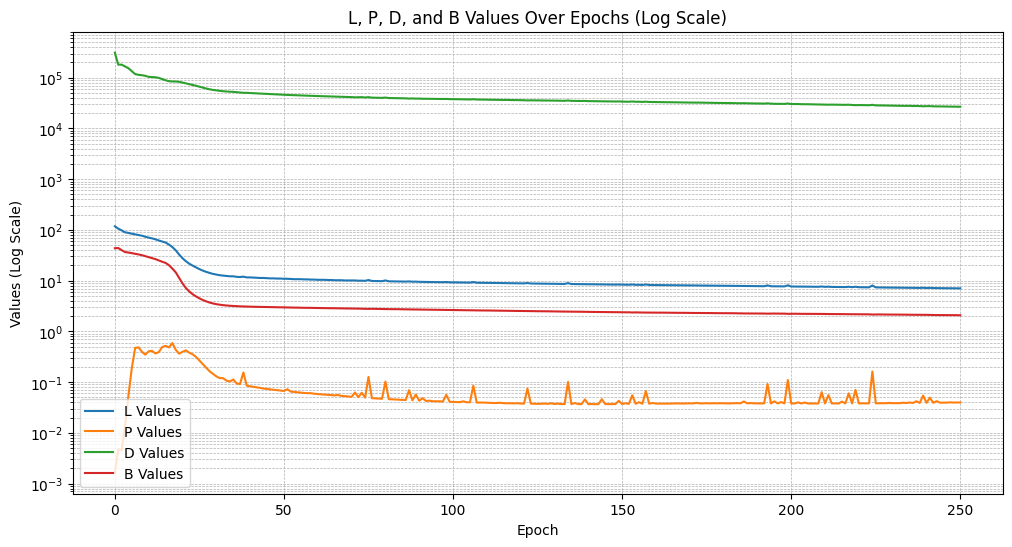

In [69]:
# Plotting
epochs = np.arange(len(L_list))
plt.figure(figsize=(12, 6))
plt.plot(epochs, L_list, label='L Values')
plt.plot(epochs, P_list, label='P Values')
plt.plot(epochs, D_list, label='D Values')
plt.plot(epochs, B_list, label='B Values')

plt.xscale('linear')
plt.yscale('log')
plt.xlabel("Epoch")
plt.ylabel("Values (Log Scale)")
plt.title("L, P, D, and B Values Over Epochs (Log Scale)")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

# THE END